<div id="header">
    <p style="color:black; text-align:center; font-weight:bold; font-family:Tahoma, sans-serif; font-size:24px;">
        K Nearest Neighbors
    </p>
</div>

<div style="background-color:#bfbfbf; padding:8px; border:2px dotted black; border-radius:8px; font-family:sans-serif; line-height: 1.7em">

KNN(K-Nearest Neighbors) employs an instance-based learning approach, where it retains all available cases and classifies new data by similarity. This method is classified as lazy learning since it doesn't develop a discriminative function from the training data. Instead, it memorizes the training dataset.

**WORKING OF KNN**

**Step 1: Selecting the optimal value of K**

K represents the number of nearest neighbors that needs to be considered while making prediction.

**Step 2: Calculating distance**

To measure the similarity between target and training data points, Euclidean distance is used. Distance is calculated between each of the data points in the dataset and target point.

**Step 3: Finding Nearest Neighbors**

The k data points with the smallest distances to the target point are the nearest neighbors.

The goal of this notebook is to implement the KNN algorithm from scratch, apply it to the **Airline Passenger Satisfaction** dataset, and determine the optimal value of `k` for prediction.
</div>



# Importing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc
from collections import Counter

In [ ]:
# Load the dataset
df = pd.read_csv("Airline_Passenger_Satisfaction.csv")

# Data Preprocessing

In [ ]:
# Drop irrelevant columns
df.drop(columns=['Unnamed', 'id'], inplace=True)

In [ ]:
# Reset index to ensure a clean index
df.reset_index(drop=True, inplace=True)

In [ ]:
# Encode the target variable (satisfaction)
df['satisfaction'] = df['satisfaction'].apply(lambda x: 1 if x == 'satisfied' else 0)

In [ ]:
# One-hot encode categorical columns
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [ ]:
# Fill missing values with the median
df.fillna(df.median(), inplace=True)

In [ ]:
# Separate features (X) and target (y)
X = df.drop(columns=['satisfaction'])
y = df['satisfaction']

In [ ]:
# Ensure X contains only numeric data
X = X.select_dtypes(include=[np.number])

In [ ]:
# Convert X to a NumPy array
X = X.to_numpy()

In [ ]:
# Perform Z-score normalization
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Splitting the Dataset

In [ ]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implementation of KNN Algorithm

In [ ]:
# Step 3: Implement the KNN algorithm
def euclidean_distance(point1, point2):
    """Compute Euclidean distance between two points"""
    return np.sqrt(np.sum((point1 - point2) ** 2))

def knn_predict(X_train, y_train, X_test, k=5):
    predictions = []
    for test_point in X_test:
        # Calculate distances from the test point to all training points
        distances = [euclidean_distance(test_point, train_point) for train_point in X_train]

        # Get the indices of the k nearest neighbors
        k_indices = np.argsort(distances)[:k]

        # Get the labels of the k nearest neighbors
        k_nearest_labels = [y_train.iloc[i] for i in k_indices]  # Use `.iloc[]` to access by position

        # Majority vote (most common class)
        most_common = Counter(k_nearest_labels).most_common(1)[0][0]
        predictions.append(most_common)

    return predictions

In [ ]:
# Step 4: Make predictions on the test set
k = 5  # Number of neighbors
y_pred = knn_predict(X_train, y_train, X_test, k)

In [ ]:
# Step 5: Evaluate the model (Accuracy calculation)
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

# Print the accuracy
print("Accuracy:", accuracy(y_test, y_pred))

Accuracy: 0.8981909160892995


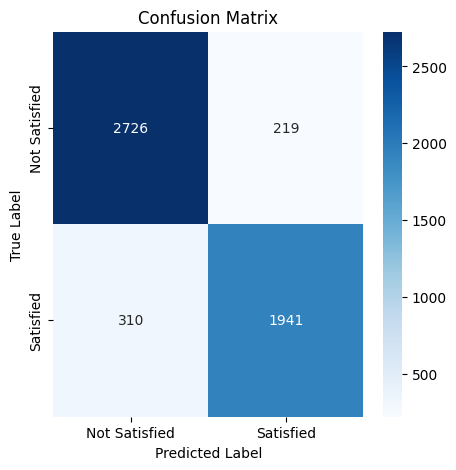

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Satisfied', 'Satisfied'], yticklabels=['Not Satisfied', 'Satisfied'])
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

# Finding a Optimum K value

In [ ]:
# Run the loop to evaluate different values of k
k_values = range(1, 16)
scores = []

for i in k_values:
    # Make predictions using the custom KNN function
    y_pred = knn_predict(X_train, y_train, X_test, k=i)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    scores.append(accuracy)

NameError: name 'knn_predict' is not defined

<div style="background-color:#bfbfbf; padding:8px; border:2px dotted black; border-radius:8px; font-family:sans-serif; line-height: 1.7em">

**Overfitting and Underfitting in KNN**

**Overfitting**

1.   When the value of k is very small (e.g., k=1), the model tends to memorize the data points, and each test point is classified based on the nearest training point. This can lead to poor generalization, as the model is highly sensitive to noise in the data.

2.   With a small k, the model has high variance, meaning it can easily adapt to the idiosyncrasies of the training data.

**Underfitting**

1.   When k is large, the model tends to take into account a large number of neighbors, which may dilute the influence of individual data points. This causes the model to become overly simplistic, failing to capture the complexity of the data.
2.   With a large k, the model has high bias because it generalizes too much and cannot capture the fine details of the data.

</div>


